<a href="https://colab.research.google.com/github/KrabMads/FinanceStuff/blob/main/Pricing_Of_Exotic_Option.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pricing of knock out option -> if option goes above x value it's worthless**

In [ ]:
!pip install numpy pandas matplotlib  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [ ]:
steps_per_year = 1000
delta_t = 1/steps_per_year
t = 1
time_period = np.arange(0, t, delta_t)
mu = 0.14
sigma = 0.2

In [ ]:
from numpy.random.mtrand import random_integers
random_integers = np.random.normal(size=(np.shape(time_period)[0]))
st = [100]

In [ ]:
def gbm(steps_per_year = 1000, t = 1, mu = 0.14, sigma = 0.2, st = [100]):
  delta_t = 1/steps_per_year
  for i in range(steps_per_year):
      change = st[-1]*delta_t*mu+sigma*st[-1]*math.sqrt(delta_t)*np.random.normal()
      st = np.append(st,st[-1]+change)
  #return(plt.plot(st))
  return(st)

In [ ]:
start = gbm()
start = start.reshape((-1,1))
np.shape(start)

(1001, 1)

In [ ]:
for i in range(0, 1000, 1):
  loop = gbm()
  loop = loop.reshape((-1,1))
  sim = np.append(start, loop, axis=1)

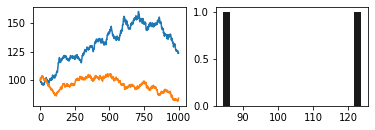

In [ ]:
fig = plt.figure() 
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(sim)
ax2 = fig.add_subplot(2, 2, 2)
ax2.hist(sim[-1], bins=20, color='black', alpha=0.9)
plt.show()

In [ ]:
print('mean')
print(np.mean(sim[-1]), '\n')
print('max')
print(np.max(sim[-1]), '\n')
print('min')
print(np.min(sim[-1]), '\n')

mean
104.0191955656731 

max
123.62406850700287 

min
84.41432262434333 



In [ ]:
#price of knock out option -> if option goes above x value it's worthless

In [ ]:
strike = 75
barrier = 110
act = gbm()
optionvalue = []
barrierhit = []

for i in range(0,np.shape(gbm())[0],1):
  if act[i] >= barrier:
    loop_optionvalue = 0
    barrierhit = 1
  else:
    if barrierhit == 1:
      loop_optionvalue = 0
    else:
      loop_optionvalue = act[i] - strike 
  optionvalue = np.append(optionvalue,loop_optionvalue)


**Plot the option value over the maturity length of the option**

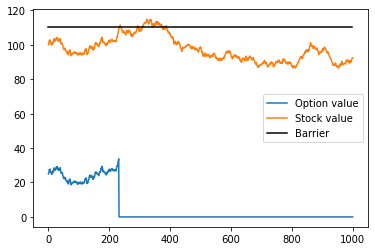

In [ ]:
constant = np.ones(1000)*barrier

plt.plot(optionvalue, label = 'Option value')
plt.plot(act, label = 'Stock value')
plt.plot(constant, label = 'Barrier', color = 'black')
plt.legend()
plt.show()

In [ ]:
def barrierknockout(strike=75, barrier=110, no_sims=10):
  strike = strike
  barrier = barrier
  act = gbm()
  meanoptionvalue = []
  listofoptionvalues = []
  
  for x in range(0,no_sims,1):
    act = gbm()
    optionvalue = []
    barrierhit = []
  
    for i in range(0,np.shape(gbm())[0],1):
      if act[i] >= barrier:
        loop_optionvalue = 0
        barrierhit = 1
      else:
        if barrierhit == 1:
          loop_optionvalue = 0
        else:
          loop_optionvalue = act[i] - strike 
      optionvalue = np.append(optionvalue,loop_optionvalue)
    listofoptionvalues = np.append(listofoptionvalues, optionvalue[-1])
  meanoptionvalue = np.append(meanoptionvalue, np.mean(listofoptionvalues))

  return(meanoptionvalue, optionvalue[-1], listofoptionvalues)

In [ ]:
mean, last, list = barrierknockout(75,120, 25)
print(mean,'\n')
print(last,'\n')
print(list,'\n')

[9.69228363] 

40.68718147987795 

[ 0.         22.86056528  0.         25.5171764   0.         20.70044159
  0.          0.         15.98248568  0.          0.         18.39049385
  0.          0.          0.          0.          0.          0.
 37.53991298  0.         -0.19184851 26.5334866  34.28719537  0.
 40.68718148] 



In [ ]:
averageoverstrike = []
for i in range(100,201,1):
  mean, last, list = barrierknockout(75,i,100)
  averageoverstrike = np.append(averageoverstrike,mean)


**Plot the relationship between option value and the barrier**

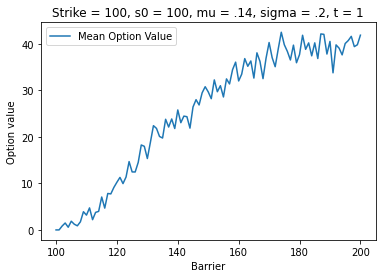

In [ ]:
x = np.arange(100,201,1)
plt.plot(x,averageoverstrike, label ='Mean Option Value')
plt.title('Strike = 100, s0 = 100, mu = .14, sigma = .2, t = 1')
plt.xlabel('Barrier')
plt.ylabel('Option value')
plt.legend()
plt.show()

Analyic formula for up-and-out call barrier option
John Hull page 621

In [ ]:
H = barrier
T = t
l_ambda = (mu+(sigma*sigma)/2)/(sigma*sigma)
q = 0 #div
x = math.log(st[0]/H)/(sigma*math.sqrt(T))+(l_ambda*sigma*math.sqrt(T))
y = math.log(H**2/st[0]*strike)/(sigma*math.sqrt(T))+(l_ambda*sigma*math.sqrt(T))
y_one = math.log(H/st[0])/(sigma*math.sqrt(T))+(l_ambda*sigma*math.sqrt(T))

In [ ]:
from scipy.stats import norm
c_ui = st[0]*norm.cdf(x)*math.exp(-q*T)-strike*math.exp(-mu*T)*norm.cdf(x-sigma*math.sqrt(T))-st[0]*math.exp(-q*T)*(H/st[0])**(2*l_ambda)*(norm.cdf(-y)-norm.cdf(-y_one))+strike*math.exp(-mu*T)*(H/st[0])**(2*l_ambda-2)*(norm.cdf(-y+sigma*math.sqrt(T)-norm.cdf(-y_one+sigma*math.sqrt(T))))
print('value of barrier option if barrier > St')
print(c_ui)

value of barrier option if barrier > St
29.05565241410068


In [ ]:
mean, last, list = barrierknockout(75,130,1000)
mean

array([16.99106599])

In [ ]:
#Vanilla option
d1 = (math.log(st[0]/strike)+(mu-q+sigma*sigma/2)*T)/(sigma*math.sqrt(T))
d2 = d1-sigma*math.sqrt(T)
c = st[0]*math.exp(-q*T)*norm.cdf(d1)-strike*math.exp(-mu*T)*norm.cdf(d2)
c

34.8916462557475

In [ ]:
#value if option is ITM
np.mean(list[list>0])


28.217316444916186

In [ ]:
prob_ITM = np.count_nonzero(list[list>0])/np.size(list)
print(prob_ITM)
print(prob_ITM*c_ui)

0.6062
17.61353649342783
